Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the dataset

In [6]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Showing How many Persons have diabetes=2,not =0, 1= pre diabetes

In [11]:
df['Diabetes_012'].value_counts().sort_index()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

CountPlot

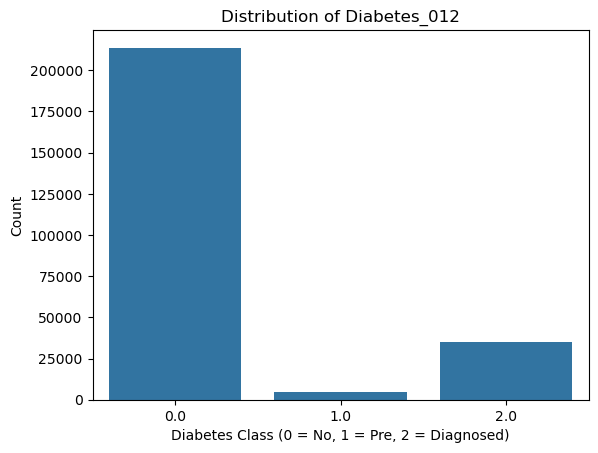

In [13]:
sns.countplot(x='Diabetes_012', data=df)
plt.title("Distribution of Diabetes_012")
plt.xlabel("Diabetes Class (0 = No, 1 = Pre, 2 = Diagnosed)")
plt.ylabel("Count")
plt.show()

Separate the binary col and other Numeric col

In [15]:

target = 'Diabetes_012'

binary_col = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != target
]

num_col = [
    col for col in df.columns.difference(binary_col) 
    if col != target
]

print('Binary Columns: ', binary_col)
print('Numerical Columns: ', num_col)

Binary Columns:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Numerical Columns:  ['Age', 'BMI', 'Education', 'GenHlth', 'Income', 'MentHlth', 'PhysHlth']


Target Variable

Print the total diabetes and non diabetes in numeric and in percentage

In [18]:
print(df[target].value_counts().sort_index())
print()
print(df[target].value_counts(normalize=True).sort_index().map(lambda x: f'{x: .3%}'))

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

Diabetes_012
0.0     84.241%
1.0      1.826%
2.0     13.933%
Name: proportion, dtype: object


Bar Chart Plot

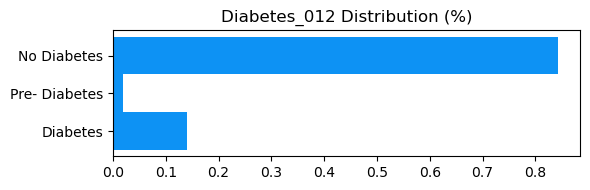

In [20]:
def plot_barchart_diabetes(df, col=target):
    ratios = df[col].value_counts(normalize=True).sort_index()
    labels = ['No Diabetes', 'Pre- Diabetes','Diabetes']
    y_pos = [0.80, 0.50,0.20]
    
    plt.figure(figsize=(6, 2))
    plt.barh(y_pos, ratios, height=0.3, color='#0D92F4')
    plt.yticks(y_pos, labels)
    plt.title(f'{col} Distribution (%)')
    
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Diplay the distribution of Diabetes_binary as a bar chart
plot_barchart_diabetes(df)  

In [21]:
# Overview of the binary variables
for col in binary_col:
    print(df[col].value_counts(sort=False).sort_index())
    print()

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

CholCheck
0.0      9470
1.0    244210
Name: count, dtype: int64

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

PhysActivity
0.0     61760
1.0    191920
Name: count, dtype: int64

Fruits
0.0     92782
1.0    160898
Name: count, dtype: int64

Veggies
0.0     47839
1.0    205841
Name: count, dtype: int64

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

AnyHealthcare
0.0     12417
1.0    241263
Name: count, dtype: int64

NoDocbcCost
0.0    232326
1.0     21354
Name: count, dtype: int64

DiffWalk
0.0    211005
1.0     42675
Name: count, dtype: int64

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64



In [22]:
def binary_var_pie(var):
    
    # Group the data
    grouped = df.groupby([target, var]).size().unstack()
    
    # Label the binary variable to blue if No, red if Yes
    labels = ['NO', 'YES','']
    colors = ['#0D92F4', '#C62E2E', '#FFFFFF']
    
    # Create space (1 row * 3 columns) for pie charts
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    
    # Pie chart for no diabetes
    if len(grouped) > 0:
        axes[0].pie(grouped.iloc[0], colors=colors, autopct='%.1f%%', startangle=90)
        axes[0].set_xlabel('No Diabetes', fontsize=10, labelpad=3)
    
    # Pie chart for pre-diabetes
    if len(grouped) > 1:
        axes[1].pie(grouped.iloc[1], colors=colors, autopct='%.1f%%', startangle=90)
        axes[1].set_xlabel('pre-Diabetes', fontsize=10, labelpad=3)
    
    # Pie chart for diabetes
    if len(grouped) > 2:
        axes[2].pie(grouped.iloc[2], colors=colors, autopct='%.1f%%', startangle=90)
        axes[2].set_xlabel('Diabetes', fontsize=10, labelpad=3)
    
    # Add a main title
    plt.suptitle(f'{var} Distribution (%)', fontsize=14, fontweight='bold')
    
    # Create legend elements
    legend_elements = [
        Patch(facecolor=colors[0], label=labels[0]),
        Patch(facecolor=colors[1], label=labels[1]),
        Patch(facecolor=colors[2], label=labels[2])
    ]
    
    # Add a legend
    fig.legend(
        handles=legend_elements,
        loc='upper right',
        bbox_to_anchor=(1, 0.95),
        frameon=False
    )

    # Add a box around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(1)
    
    plt.tight_layout(pad=1.3)
    plt.show()

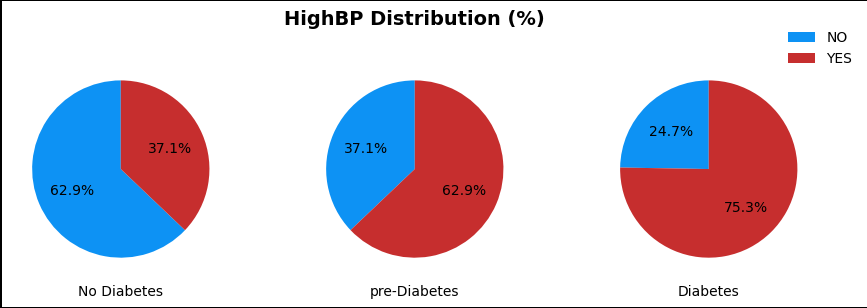

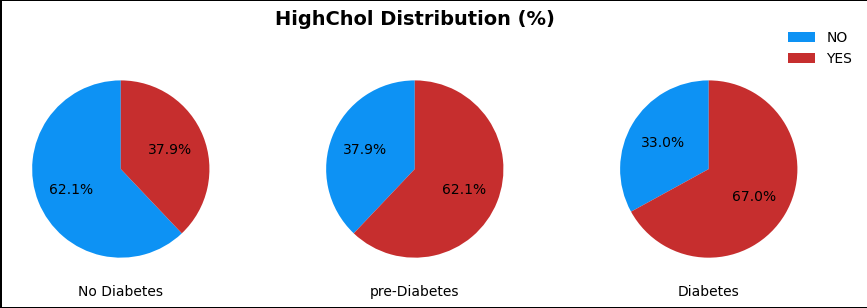

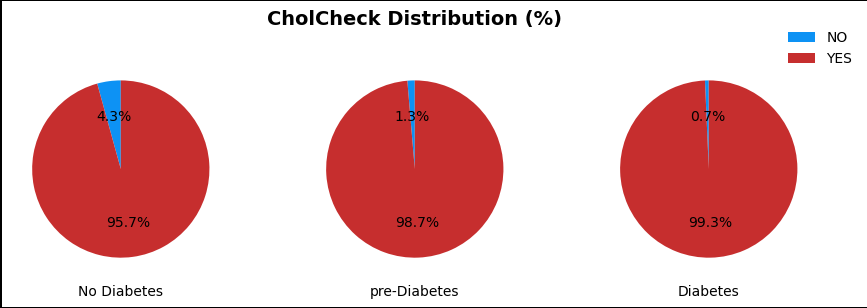

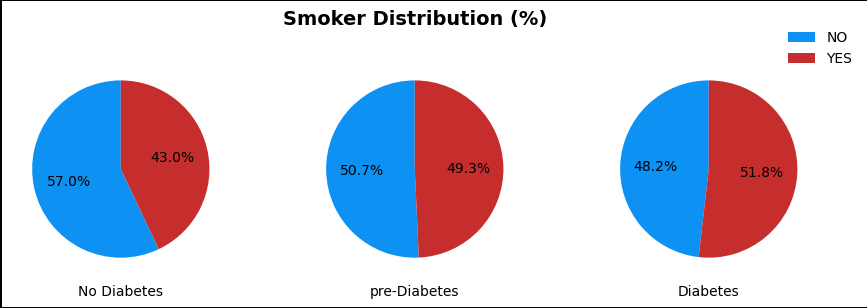

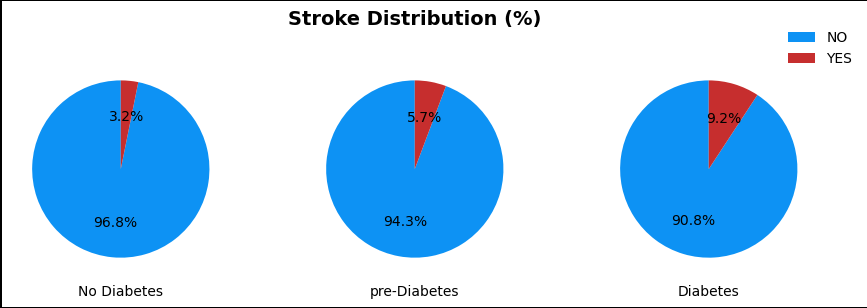

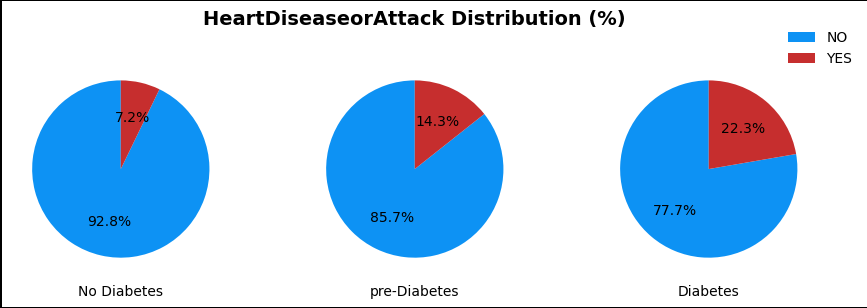

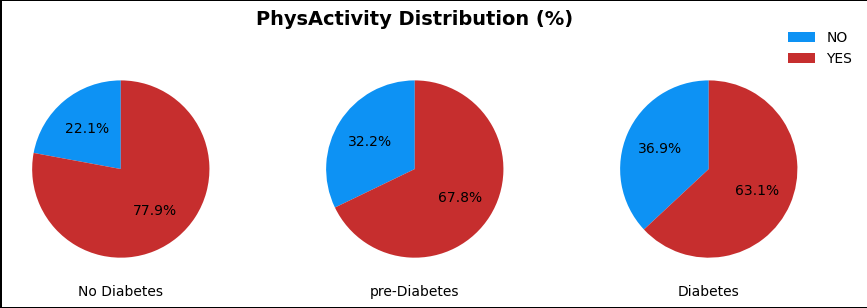

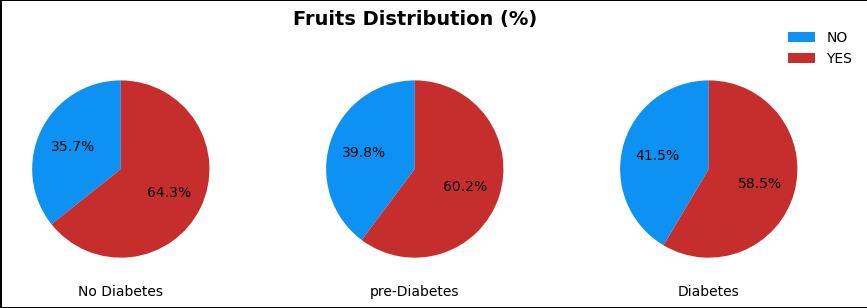

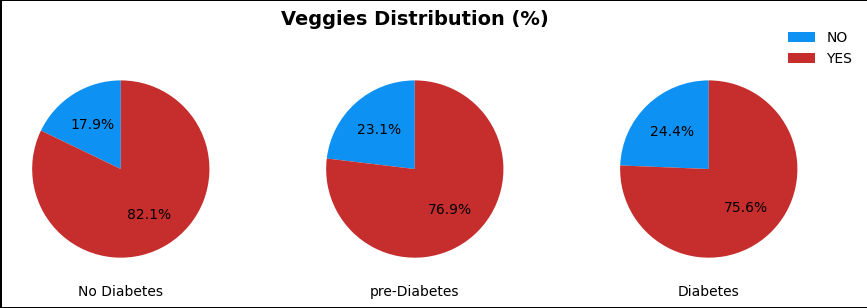

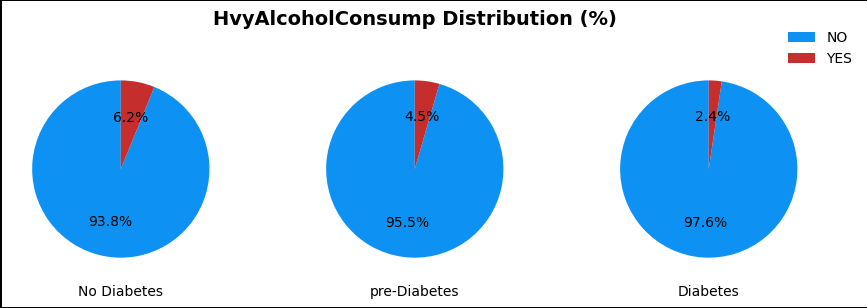

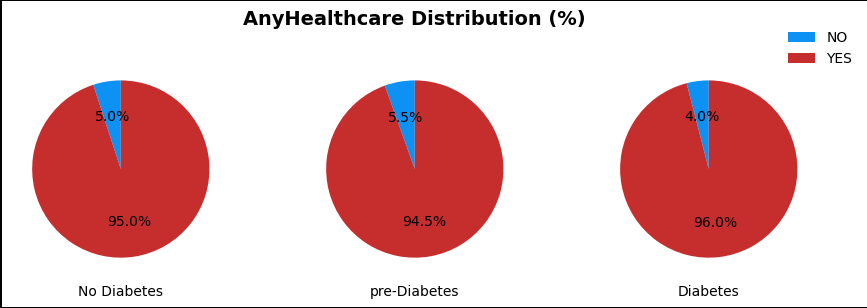

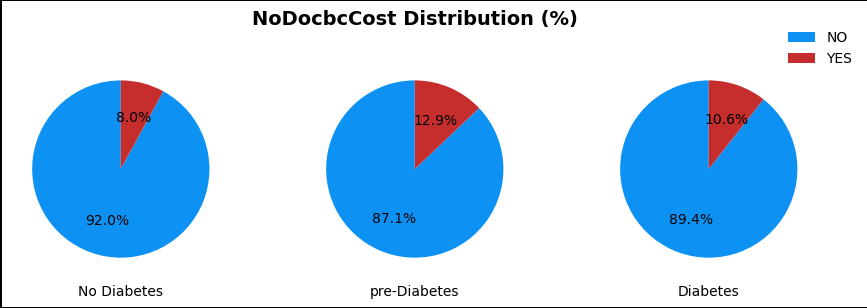

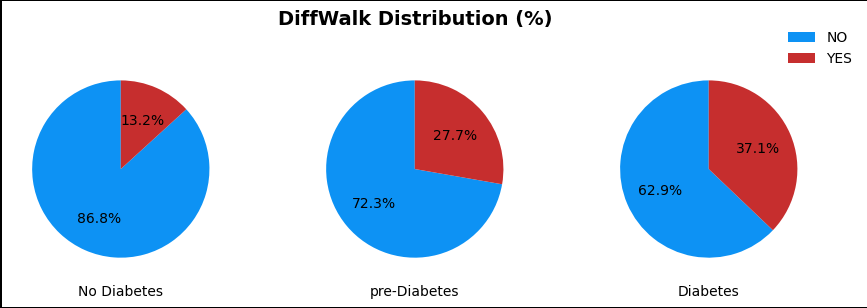

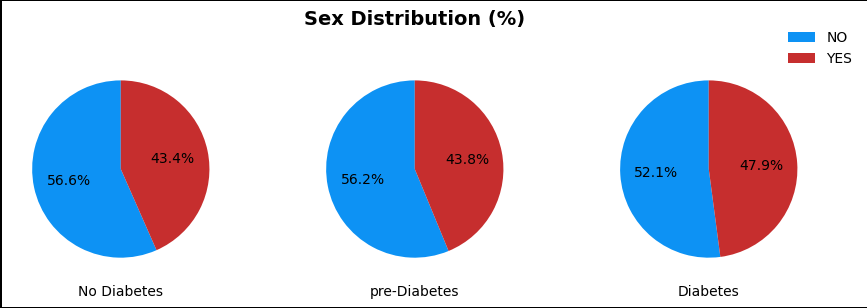

In [23]:
# Create pie charts for all binary variables
for col in binary_col:
    binary_var_pie(col)

Numberic variable

In [25]:
# Overview of the numerical variables (1) : Number of unique values
print(f'Number of unique values:')
print(df[num_col].nunique())

Number of unique values:
Age          13
BMI          84
Education     6
GenHlth       5
Income        8
MentHlth     31
PhysHlth     31
dtype: int64


checking Diabetes and non diabetes according to the Numeric variable like age, Edaucation etc

In [27]:

for col in num_col:
    print(f'<Mean values of {col}>')
    print(df.groupby(target)[col].mean())
    print()

<Mean values of Age>
Diabetes_012
0.0    7.786559
1.0    9.083351
2.0    9.379053
Name: Age, dtype: float64

<Mean values of BMI>
Diabetes_012
0.0    27.742521
1.0    30.724466
2.0    31.944011
Name: BMI, dtype: float64

<Mean values of Education>
Diabetes_012
0.0    5.106629
1.0    4.784496
2.0    4.745516
Name: Education, dtype: float64

<Mean values of GenHlth>
Diabetes_012
0.0    2.372391
1.0    2.975599
2.0    3.290981
Name: GenHlth, dtype: float64

<Mean values of Income>
Diabetes_012
0.0    6.208663
1.0    5.351112
2.0    5.210094
Name: Income, dtype: float64

<Mean values of MentHlth>
Diabetes_012
0.0    2.944404
1.0    4.529907
2.0    4.461806
Name: MentHlth, dtype: float64

<Mean values of PhysHlth>
Diabetes_012
0.0    3.582416
1.0    6.348305
2.0    7.954479
Name: PhysHlth, dtype: float64



Histrogram

In [29]:
def num_var_line(var):
    # Count the number of unique values
    num_unique_vals = df[var].nunique()
    
    # Separate numerical variables by diabetes status
    num_var_no = df[df[target] == 0][var]
    num_var_pre = df[df[target] == 1][var]
    num_var_yes = df[df[target] == 2][var]
    
    # Create plot space
    plt.figure(figsize=(5, 3))
    
    # Plot histogram for no diabetes, pre-diabetes, and diabetes
    # while suppressing future warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.histplot(num_var_no, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='No Diabetes',
                     color='#0D92F4',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_pre, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Pre-Diabetes',
                     color='#FFFF00',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_yes, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Diabetes',
                     color='#C62E2E',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
    
    # Format the plot
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    
    # Remove top and right spines
    plt.gca().spines[['top', 'right']].set_visible(False)
    
    # Add grid lines and legend
    plt.grid(axis='both', linestyle=':', alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


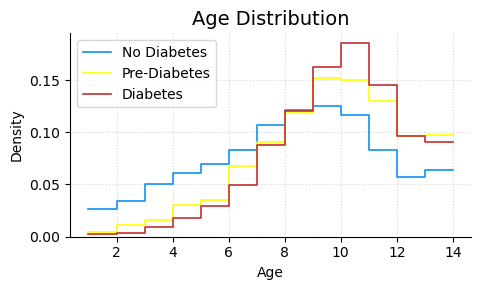

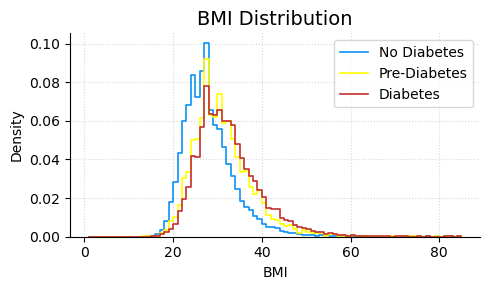

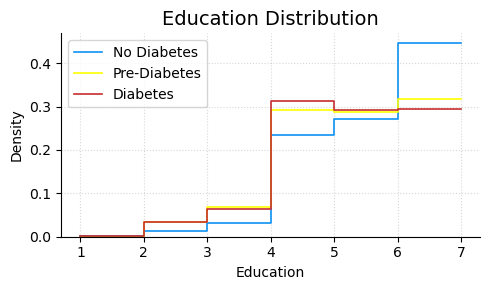

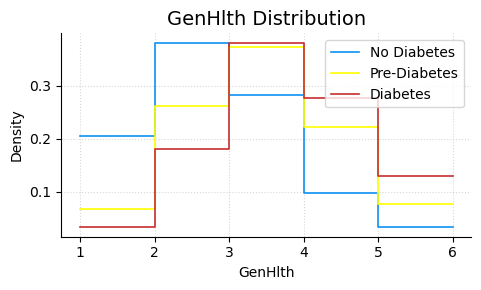

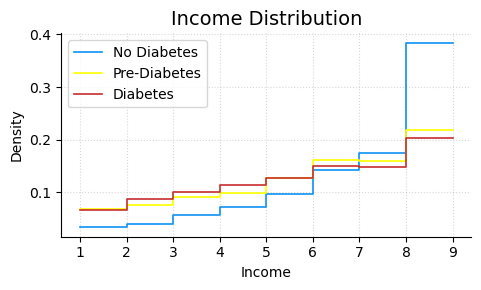

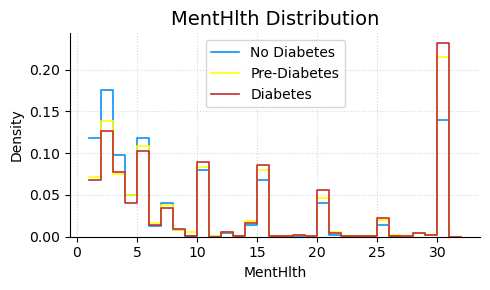

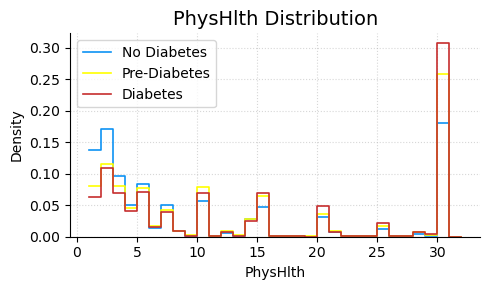

In [30]:
for col in num_col:
    num_var_line(col)

Heatmap

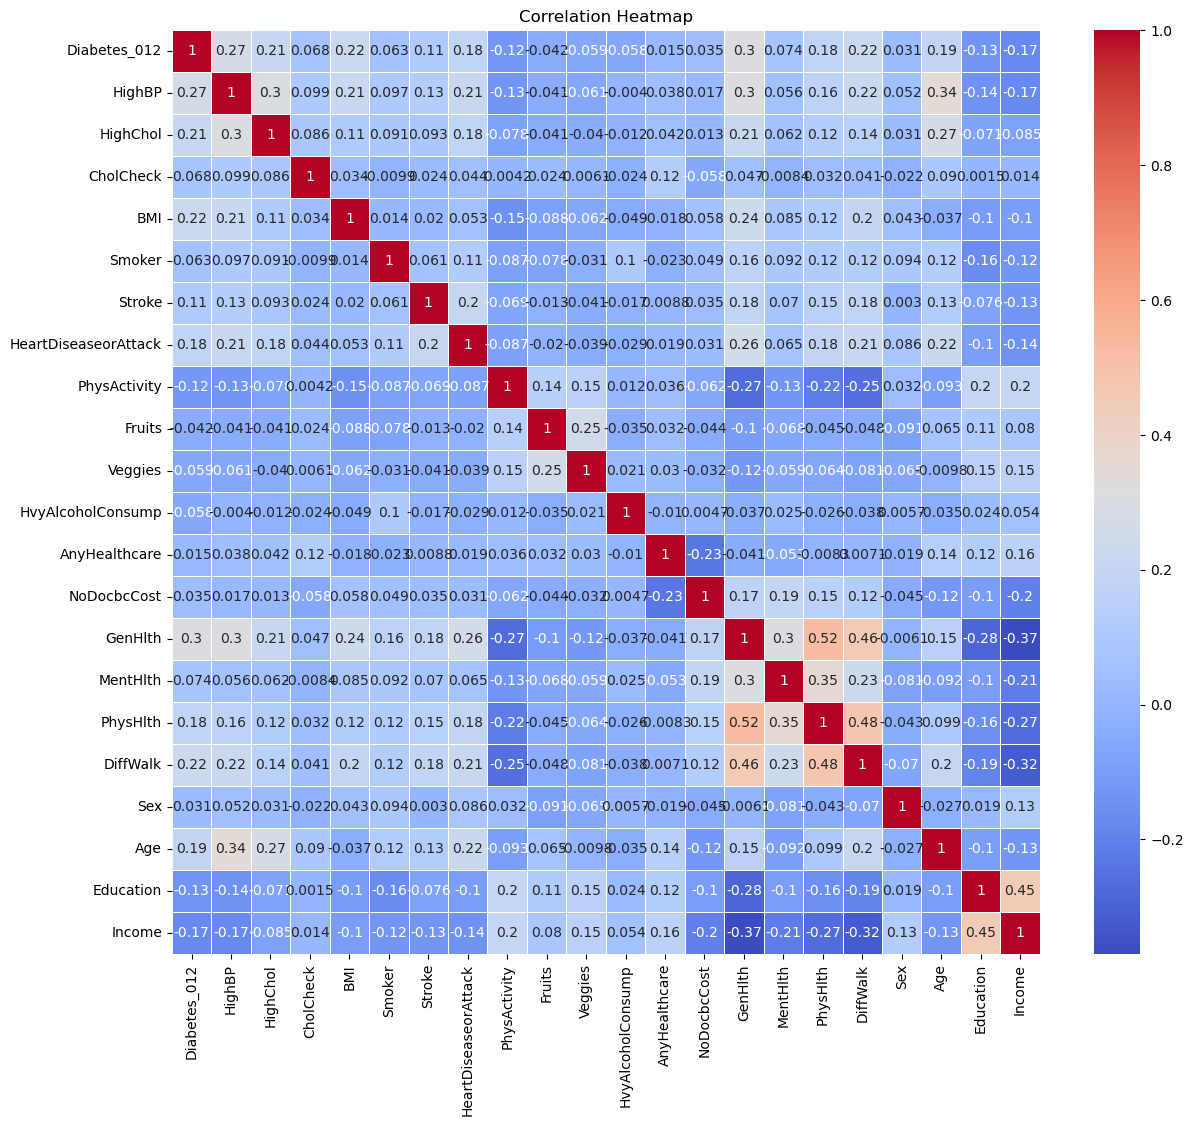

In [32]:
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

BoxPlot

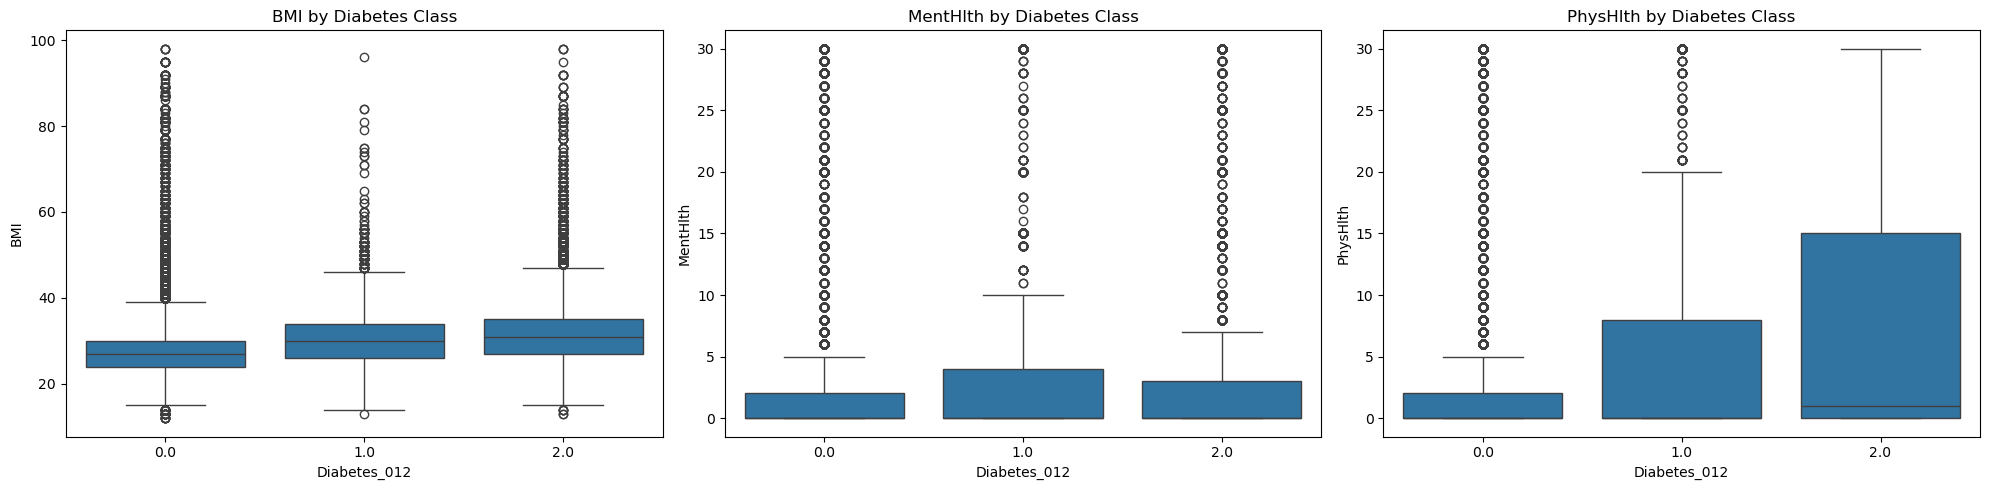

In [34]:
features = ['BMI', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(20, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Diabetes_012', y=feature, data=df)
    plt.title(f"{feature} by Diabetes Class")
plt.tight_layout()
plt.show()

Machine Learning Models

In [96]:
# Split features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=25,  stratify=y)

# Scale the data (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [84]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
105893,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,0.0,1.0,6.0,6.0,8.0
129128,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,5.0,0.0,10.0,0.0,0.0,13.0,5.0,3.0
134648,0.0,0.0,1.0,23.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
117501,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,6.0,5.0
116521,0.0,0.0,0.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77851,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
112841,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,4.0,8.0
8103,0.0,0.0,1.0,24.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,11.0,5.0,8.0
115838,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,6.0


Logistic Regression

Logistic Regression Results:
Model Accuracy: 0.6490854619993692
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     42741
         1.0       0.03      0.30      0.06       926
         2.0       0.36      0.59      0.44      7069

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736



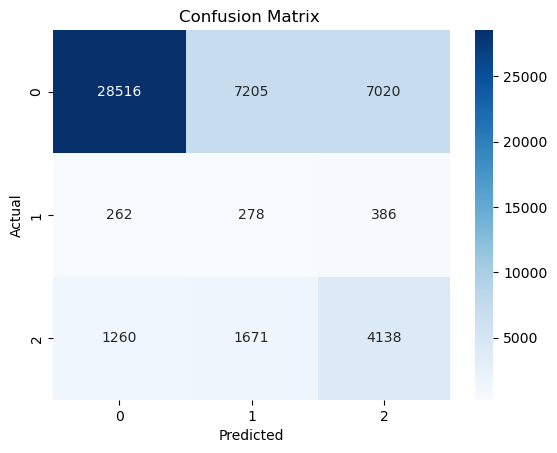

In [167]:
print("Logistic Regression Results:")
log_model = LogisticRegression(multi_class='multinomial', class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred_log))
#Confusion  Matrix
fk= confusion_matrix(y_test, y_pred_log)
sns.heatmap(fk, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
print(classification_report(y_test, y_pred_log))

Random Forest

Random Forest Results:
Model Accuracy: 0.8425772626931567
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.02      0.00      0.00       926
         2.0       0.49      0.20      0.28      7069

    accuracy                           0.84     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.80      0.84      0.81     50736



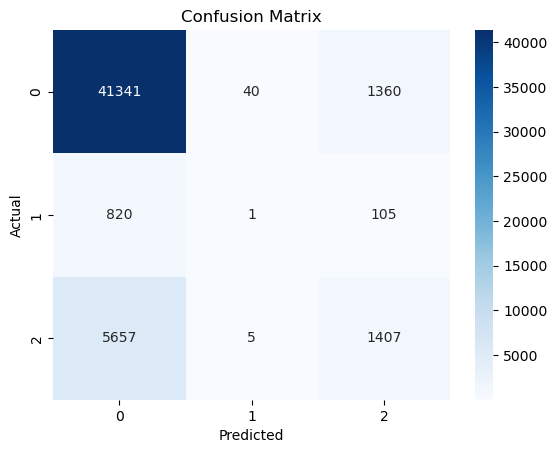

In [98]:
print("Random Forest Results:")
rf_model = RandomForestClassifier(n_estimators=100,random_state=52)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred_rf))
#Confusion  Matrix
fk = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(fk, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
print(classification_report(y_test, y_pred_rf))

XGBoost

XGBoost Results:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.19      0.29      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



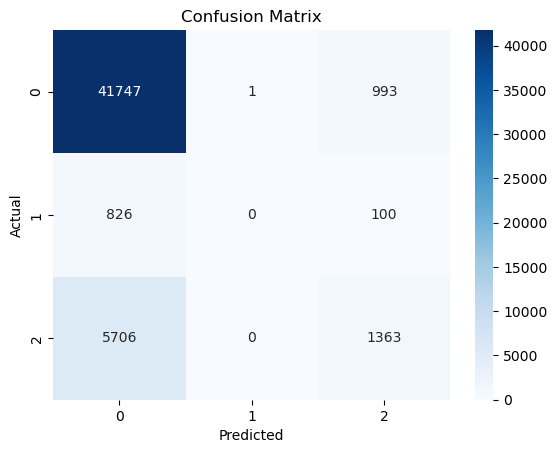

In [169]:
from xgboost import XGBClassifier
print("XGBoost Results:")
xgb_model = XGBClassifier(eval_metric='mlogloss',random_state=25)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
#Confusion  Matrix
fk = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(fk, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
print(classification_report(y_test, y_pred_xgb))